In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#YOLOv3 configuration and weights files
cfg_path = 'D:/Downloads/yolov3-helmet.cfg'
weights_path = 'C:/Users/Nidhi/Downloads/yolov3-helmet.weights'
names_path = 'C:/Users/Nidhi/Downloads/helmet.names'


# Load YOLOv3 model
net = cv2.dnn.readNet(weights_path, cfg_path)
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Load class names
with open(names_path, 'r') as f:
    classes = [line.strip() for line in f.readlines()]

# Define a function to load image
def load_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

# Display image
def display_image(img, title='Image'):
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

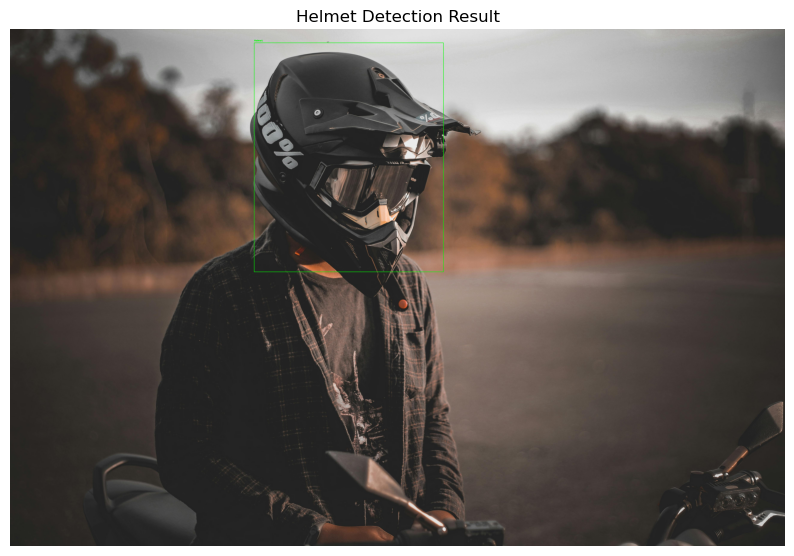

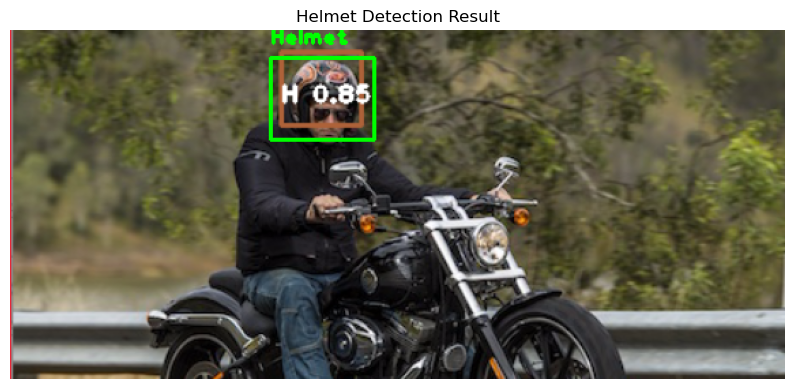

In [2]:
# Process Images for Helmet Detection
def detect_helmets(img):
    height, width = img.shape[:2]

    # Create a blob from the image
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    class_ids = []
    confidences = []
    boxes = []

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    return boxes, confidences, class_ids, indexes

def draw_labels(img, boxes, confidences, class_ids, indexes):
    font = cv2.FONT_HERSHEY_PLAIN
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = (0, 255, 0) if label == "Helmet" else (0, 0, 255)
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            cv2.putText(img, label, (x, y - 10), font, 1, color, 2)
    return img

# Test the Detection on an Image
img_path = 'C:/Users/Nidhi/Downloads/h2.jpg'
img = load_image(img_path)

# Detect helmets
boxes, confidences, class_ids, indexes = detect_helmets(img)

# Draw labels
result_img = draw_labels(img, boxes, confidences, class_ids, indexes)

# Display the result
display_image(result_img, title='Helmet Detection Result')


########
# Test the Detection on an Image
img_path = 'C:/Users/Nidhi/Downloads/helmet_detection.jpg'
img = load_image(img_path)

# Detect helmets
boxes, confidences, class_ids, indexes = detect_helmets(img)

# Draw labels
result_img = draw_labels(img, boxes, confidences, class_ids, indexes)

# Display the result
display_image(result_img, title='Helmet Detection Result')
############33

# Optional: Real-Time Detection from Video Stream
def detect_helmets_in_video(video_path):
    cap = cv2.VideoCapture(video_path)
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Resize frame to maintain the aspect ratio and avoid zooming issues
        scale_percent = 60  # percent of original size
        width = int(frame.shape[1] * scale_percent / 100)
        height = int(frame.shape[0] * scale_percent / 100)
        dim = (width, height)
        frame_resized = cv2.resize(frame, dim, interpolation=cv2.INTER_AREA)

        # Detect helmets
        boxes, confidences, class_ids, indexes = detect_helmets(frame_resized)

        # Draw labels
        result_frame = draw_labels(frame_resized, boxes, confidences, class_ids, indexes)
        
        # Display the frame
        cv2.imshow('Helmet Detection', result_frame)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# Test with a video file


video_path = 'D:/Downloads/5198907-uhd_4096_2160_25fps.mp4'
detect_helmets_in_video(video_path)